In [1]:
%pip install pandas numpy matplotlib statsmodels scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('dados.csv')

In [4]:
df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True, dayfirst=True)
df = df.sort_values('Data')

C:\Users\athos\AppData\Local\Temp\ipykernel_9160\214436000.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True, dayfirst=True)


In [5]:
fechamento = df[['Data', 'Último']].set_index('Data')

In [6]:
treino = fechamento.iloc[:-30]
teste = fechamento.iloc[-30:]


In [7]:
modelo = ARIMA(treino, order=(5, 1, 0))
modelo_treinado = modelo.fit()
previsoes = modelo_treinado.forecast(steps=30)


c:\Users\athos\anaconda3\envs\ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\athos\anaconda3\envs\ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\athos\anaconda3\envs\ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\athos\anaconda3\envs\ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  r

In [8]:
mse = mean_squared_error(teste, previsoes)
print(f'MSE: {mse}')

MSE: 18.016567529547533


In [9]:
# Garantindo que as previsões sejam um array NumPy unidimensional
previsoes = previsoes.values  # Converte para NumPy array

# Calculando o MAPE
mape = np.mean(np.abs((teste.values - previsoes) / teste.values)) * 100

# Calculando a acurácia
acuracia = 100 - mape
print(f'MAPE: {mape:.2f}%')
print(f'Acurácia: {acuracia:.2f}%')

MAPE: 2.77%
Acurácia: 97.23%


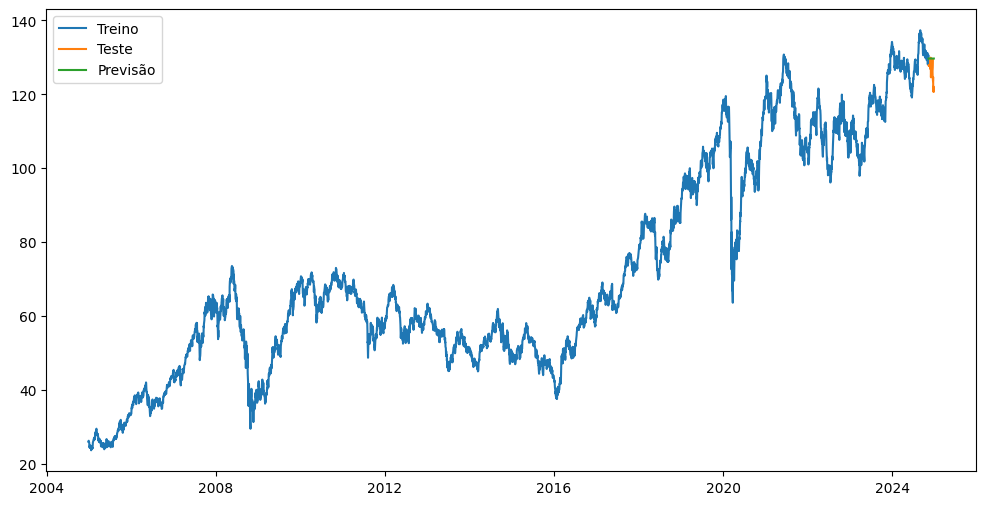

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(treino.index, treino, label='Treino')
plt.plot(teste.index, teste, label='Teste')
plt.plot(teste.index, previsoes, label='Previsão')
plt.legend()
plt.show()